In [21]:
# Impute missing values in 'Director', 'Cast', and 'Country' with 'Unknown'
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')

# Verify that missing values have been handled
display(df.isnull().sum())

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,10
Rating,7
Duration,0
Type,0


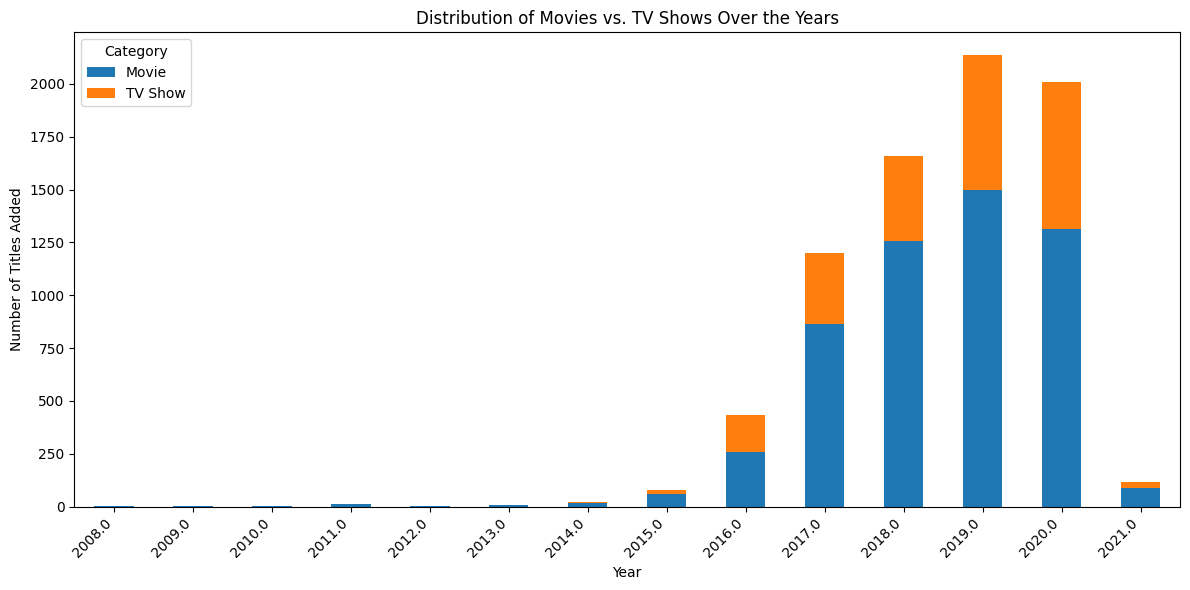

In [24]:
# Plot the distribution of Movies vs. TV Shows over the years
content_type_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Movies vs. TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

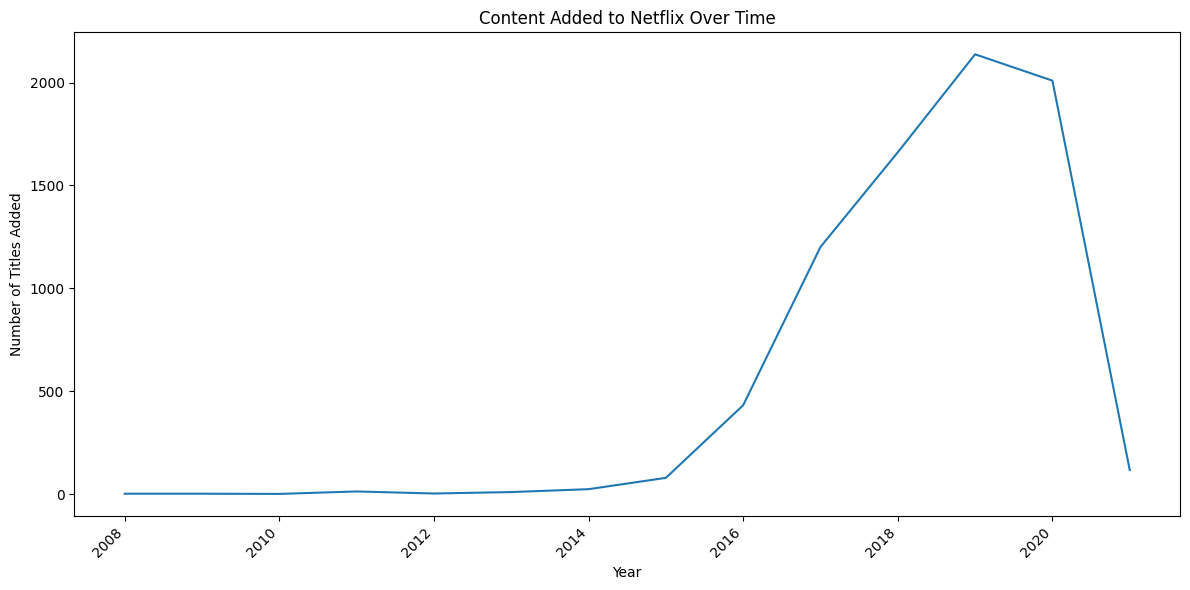

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot content added by year
plt.figure(figsize=(12, 6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values)
plt.title('Content Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Convert 'Release_Date' to datetime objects, coercing errors
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract the year from the 'Release_Date'
df['Release_Year'] = df['Release_Date'].dt.year

# Analyze the distribution of Movies vs. TV Shows over the years
content_type_by_year = df.groupby(['Release_Year', 'Category']).size().unstack().fillna(0)

# Display the distribution
display(content_type_by_year)

Category,Movie,TV Show
Release_Year,,
2008.0,1.0,1.0
2009.0,2.0,0.0
2010.0,1.0,0.0
2011.0,13.0,0.0
2012.0,3.0,0.0
2013.0,6.0,4.0
2014.0,19.0,5.0
2015.0,58.0,21.0
2016.0,258.0,174.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


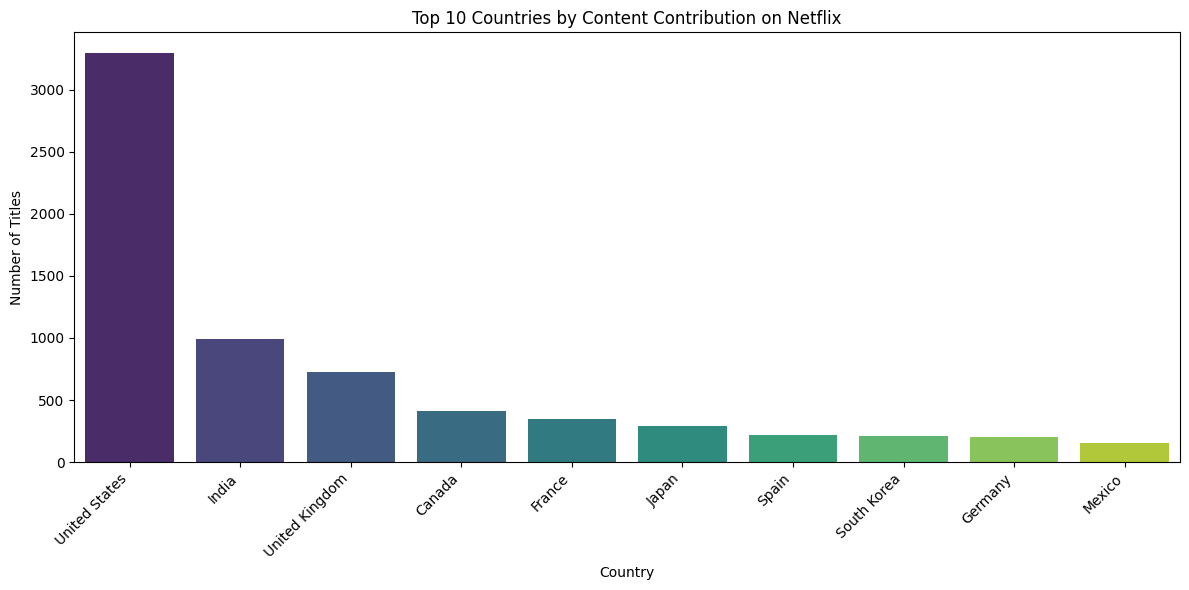

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=country_distribution.head(10).index, y=country_distribution.head(10).values, palette='viridis', hue=country_distribution.head(10).index, legend=False)
plt.title('Top 10 Countries by Content Contribution on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

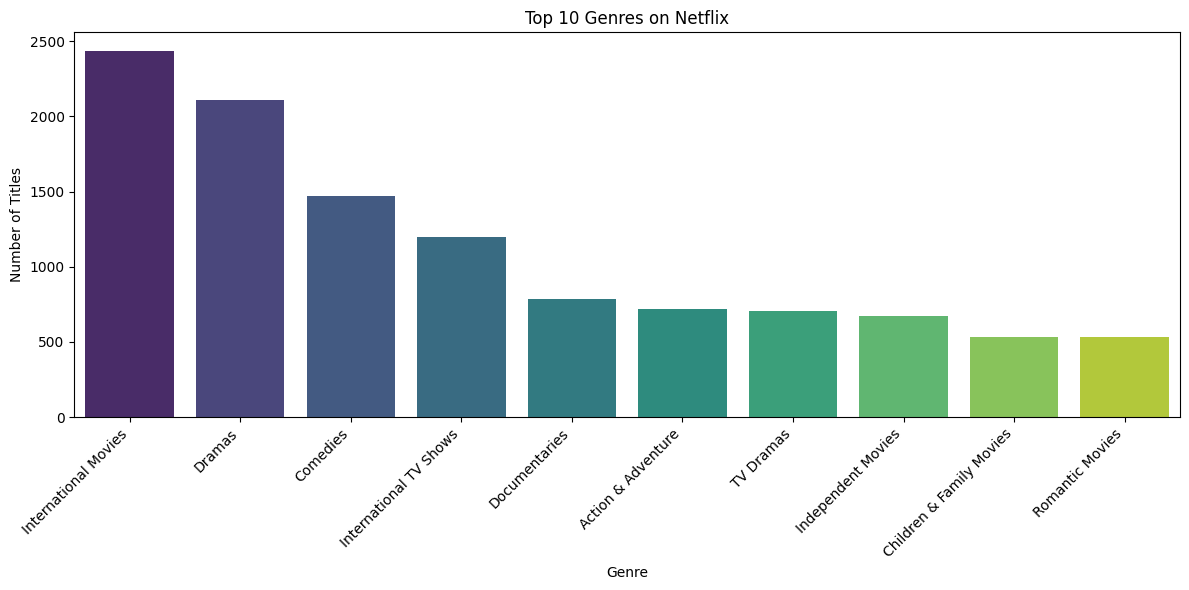

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_distribution.head(10).index, y=genre_distribution.head(10).values, palette='viridis', hue=genre_distribution.head(10).index, legend=False)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# Analyze genre distribution over the years
# First, split the 'Type' column to get individual genres for each title and keep the Release_Year
genres_by_year = df.assign(Type=df['Type'].str.split(', ')).explode('Type')[['Release_Year', 'Type']]

# Group by year and genre, and count the occurrences
genre_popularity_over_time = genres_by_year.groupby(['Release_Year', 'Type']).size().unstack().fillna(0)

# Display the genre popularity over time (showing first few rows and columns for brevity)
display(genre_popularity_over_time.head())

Type,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
Release_Year,,,,,,,,,,,,,,,,,,,,,
2008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


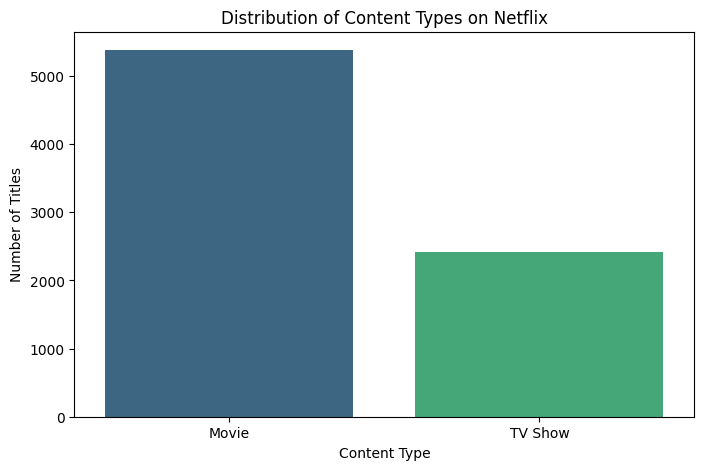

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of content types
plt.figure(figsize=(8, 5))
sns.barplot(x=content_type_distribution.index, y=content_type_distribution.values, palette='viridis', hue=content_type_distribution.index, legend=False)
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

## Netflix Content Trends Analysis: Key Findings and Strategic Recommendations

Based on the analysis of the Netflix dataset, the following key findings and strategic recommendations are presented:

### Key Findings:

*   **Content Type Distribution:** The Netflix library is significantly dominated by Movies compared to TV Shows.
*   **Genre Popularity:** The most prevalent genres are **International Movies, Dramas, Comedies, and International TV Shows**, indicating a strong focus on globally appealing content and popular categories.
*   **Country Contributions:** The **United States, India, and the United Kingdom** are the top three countries contributing content to Netflix, highlighting their importance as key markets and content sources.
*   **Temporal Trends in Content Addition:** There has been a substantial increase in the amount of content added to Netflix over the years, with a notable **peak around 2019-2020**, followed by a slight decline. This suggests a period of aggressive expansion in content acquisition and production.
*   **Missing Data:** While we addressed missing values in 'Director', 'Cast', and 'Country' by imputing 'Unknown', it's worth noting that these columns initially had a significant number of missing entries, which could impact analyses relying heavily on this information.

### Strategic Recommendations:

*   **Content Diversification:** While capitalizing on popular genres and international content is crucial, Netflix could strategically **explore and invest in less represented genres or niche categories** to attract new subscriber segments and gain a competitive edge.
*   **Targeted Market Content Strategy:** Given the strong content presence from the US, India, and the UK, Netflix should continue to tailor its content strategy for these key markets while also actively **exploring opportunities for content acquisition and production in emerging markets** with growing subscriber bases.
*   **Analyze Temporal Trends Further:** Investigate the underlying reasons for the peak in content additions around 2019-2020 and the subsequent trend. Understanding the drivers behind this pattern (e.g., increased original productions, major licensing deals) can **inform future content budgeting and acquisition decisions**.
*   **Enhance Data Quality:** While we imputed missing values, a more comprehensive approach to handling missing data or enriching the dataset with external information could lead to **deeper and more robust analyses** in the future.
*   **Audience Preference Analysis:** To further refine strategic recommendations, future analysis could focus on **correlating content trends with audience viewing patterns and preferences** to understand which content types, genres, or country-specific content resonate most with different subscriber segments.